# Multiple Linear Regression (Income Prediction)

Penjelasan Kolom:
- Age = Umur
- Experience = Pengalaman Kerja
- Income = Penghasilan

## A. Data Preparation

### A.1 Import Libraries

In [112]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### A.2 Load Data

In [113]:
try:
    df = pd.read_csv('multiple_linear_regression_dataset.csv')
    print("Berhasil membaca data")
except Exception as e:
    print("Gagal membaca data")

Berhasil membaca data


### A.3 Cek Dimensi Data

In [114]:
df.shape

(20, 3)

### A.4 Cek Informasi Data

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   age         20 non-null     int64
 1   experience  20 non-null     int64
 2   income      20 non-null     int64
dtypes: int64(3)
memory usage: 612.0 bytes


### A.5 Cek Data Teratas & Terbawah Data

In [116]:
df.head()

,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830


In [117]:
df.tail()

,age,experience,income
15,41,6,38900
16,58,17,63600
17,23,1,30870
18,44,9,44190
19,37,10,48700


### A.6 Cek Data Duplikat

In [118]:
df.duplicated().sum()

np.int64(0)

### A.7 Cek Data Hilang

In [119]:
df.isna().sum()

age           0
experience    0
income        0
dtype: int64

## B. Preprocessing

In [120]:
df.columns

Index(['age', 'experience', 'income'], dtype='object')

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   age         20 non-null     int64
 1   experience  20 non-null     int64
 2   income      20 non-null     int64
dtypes: int64(3)
memory usage: 612.0 bytes


## C. Exploratory Data Analysis (EDA)

### C.1 Cek Data Outliers

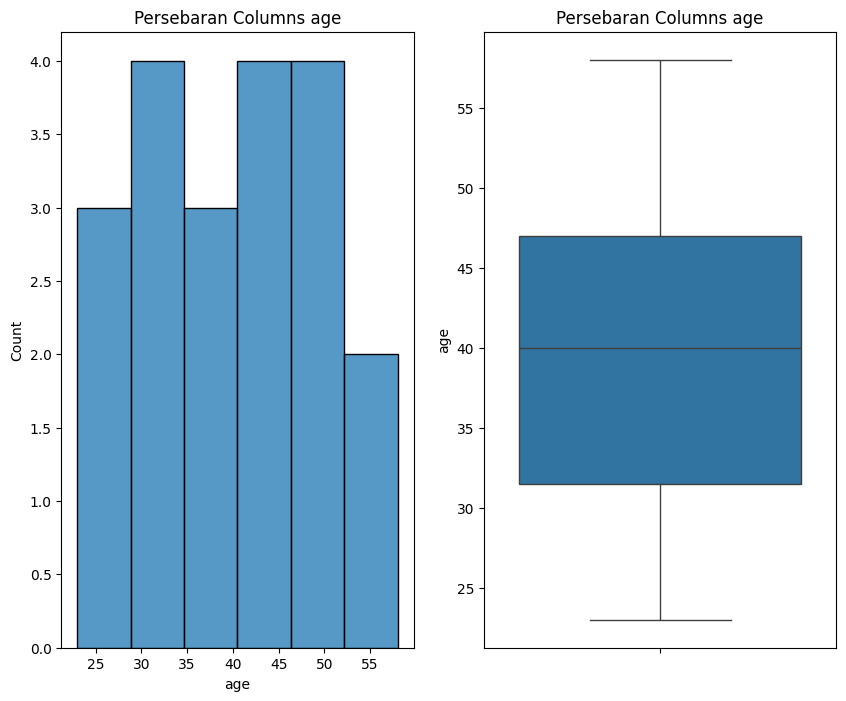

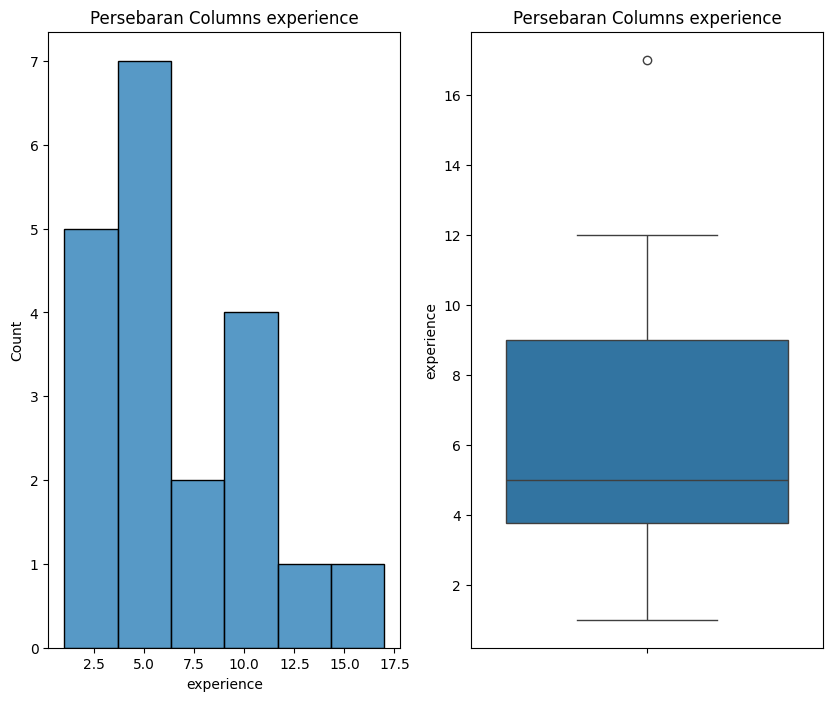

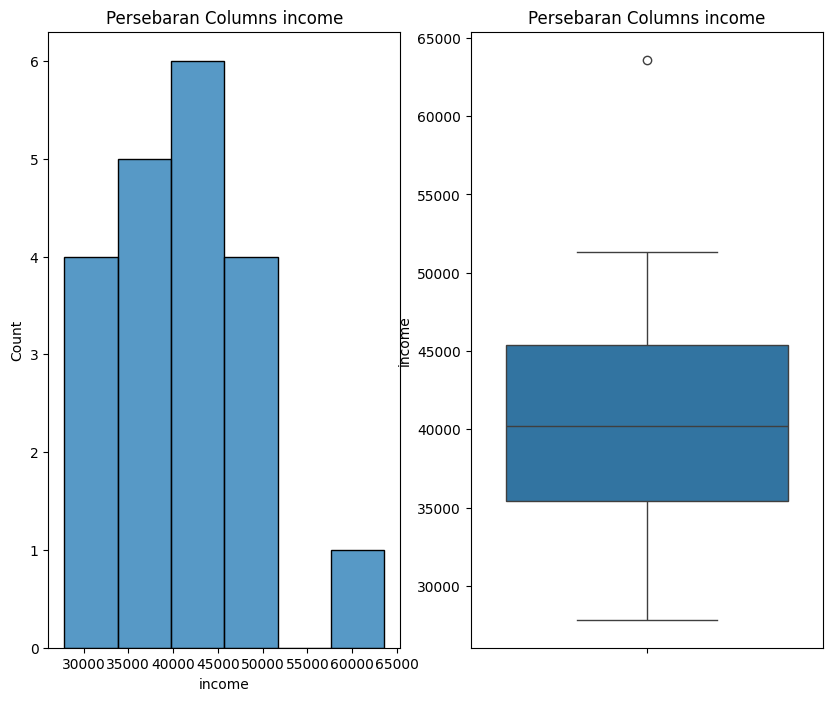

In [122]:
for col in df.columns:
    fig, axes = plt.subplots(1, 2, figsize=(10, 8))
    sns.histplot(df[col], ax = axes[0])
    axes[0].set_title(f"Persebaran Columns {col}")
    
    sns.boxplot(df[col], ax = axes[1])
    axes[1].set_title(f"Persebaran Columns {col}")
    
plt.show()

In [123]:
df['experience'] = df['experience'].clip(1, 12)
df['income'] = df['income'].clip(20000, 53000)

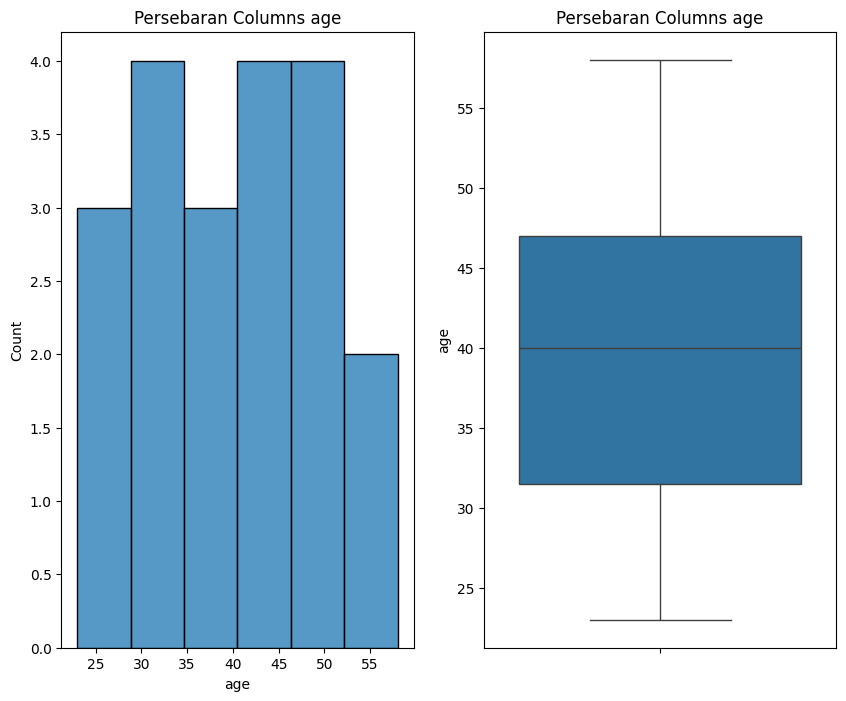

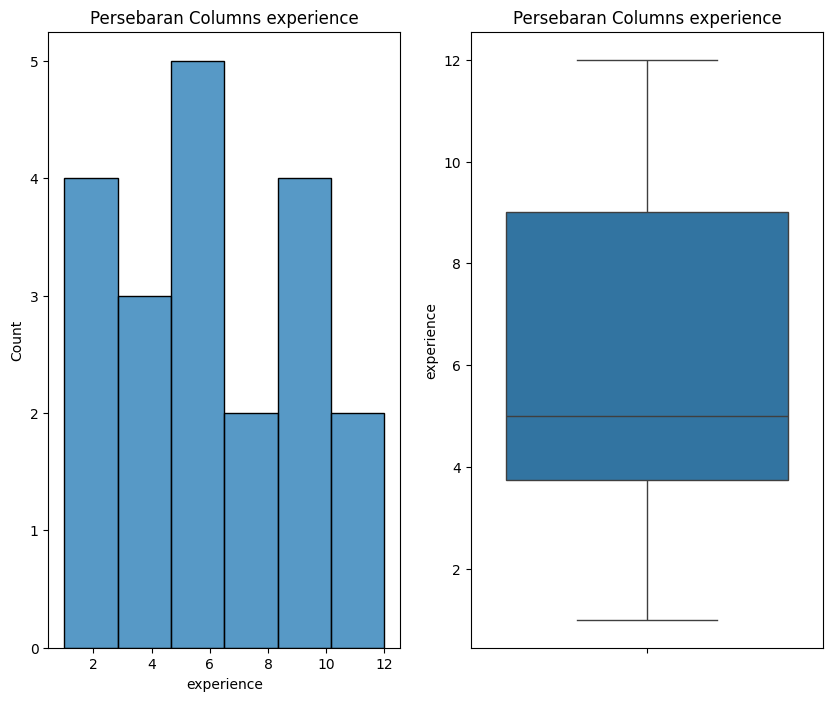

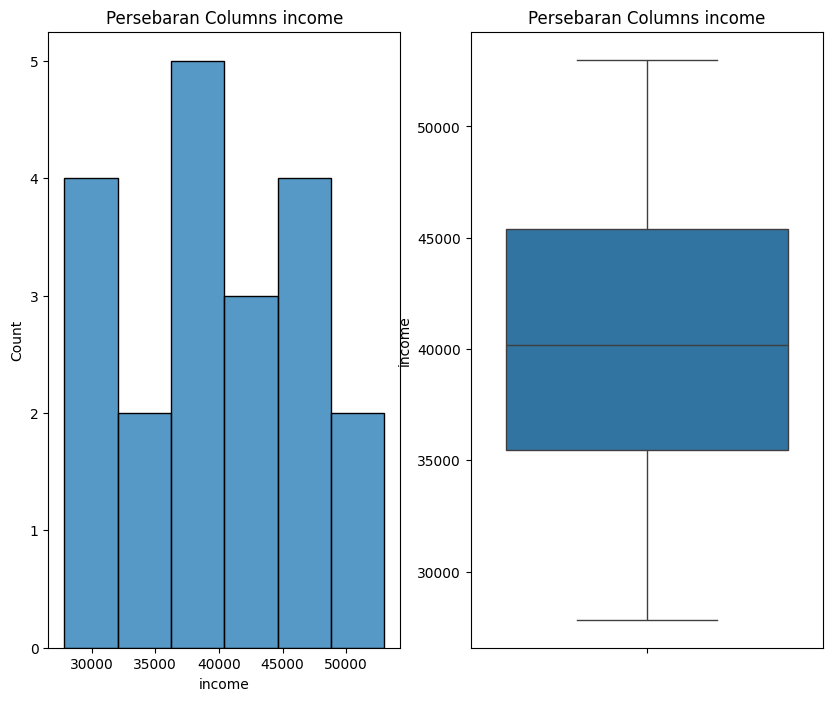

In [124]:
for col in df.columns:
    fig, axes = plt.subplots(1, 2, figsize=(10, 8))
    sns.histplot(df[col], ax = axes[0])
    axes[0].set_title(f"Persebaran Columns {col}")
    
    sns.boxplot(df[col], ax = axes[1])
    axes[1].set_title(f"Persebaran Columns {col}")
    
plt.show()

In [125]:
df.skew()

age           0.048133
experience    0.226637
income        0.051439
dtype: float64

### B.2 Visualisasi Scatter

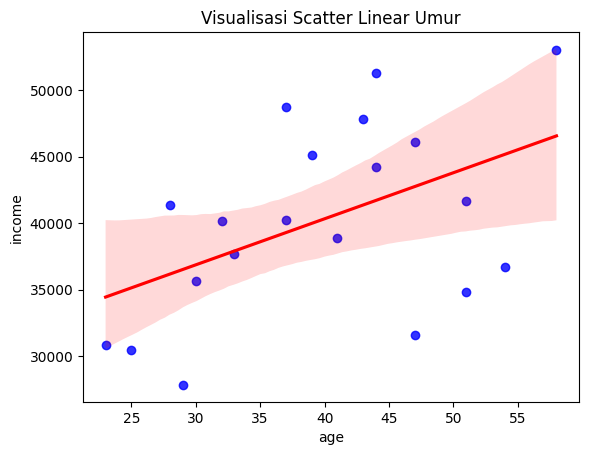

In [126]:
sns.regplot(data=df, x='age', y='income', color='blue', line_kws={'color' : 'red'})
plt.title("Visualisasi Scatter Linear Umur")
plt.show()

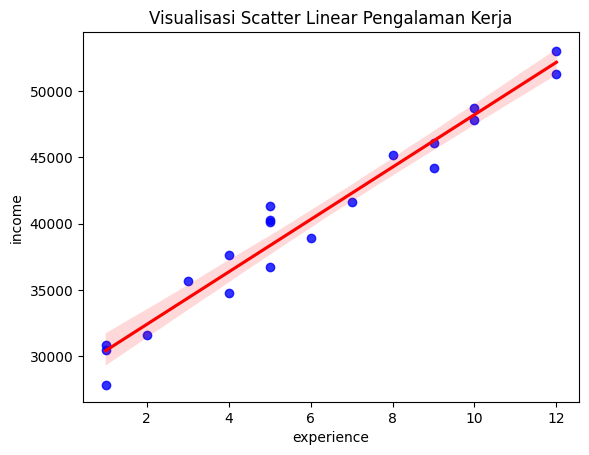

In [127]:
sns.regplot(data=df, x='experience', y='income', color='blue', line_kws={'color' : 'red'})
plt.title("Visualisasi Scatter Linear Pengalaman Kerja")
plt.show()

### C.3 Visualisasi Korelasi

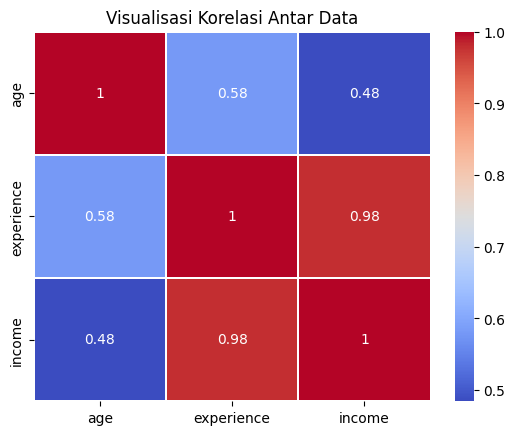

In [128]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=1.1)
plt.title("Visualisasi Korelasi Antar Data")
plt.show()

### C.4 Korelasi Category Umur dan Pengalaman

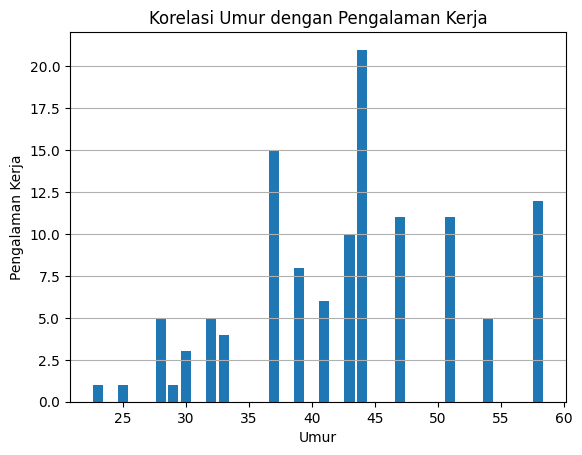

In [129]:
umur_pengalaman = df.groupby('age')['experience'].sum()

plt.bar(umur_pengalaman.index, umur_pengalaman.values)
plt.title("Korelasi Umur dengan Pengalaman Kerja")
plt.xlabel("Umur")
plt.ylabel("Pengalaman Kerja")
plt.grid(axis='y')
plt.show()

## D. Modelling

### D.1 Buat Variabel X dan Y

In [130]:
X_data = df[['age', 'experience']].values
y_data = df[['income']].values

In [ ]:
ones = np.ones((len(X_data), 1))
X_matrix = np.concatenate((ones, X_data), axis=1)

### D.2 Tambah Bias Di X_data

In [131]:
# ones = np.ones((len(X_data), 1))
# X_matrix = np.concatenate((ones, X_data), axis=1)

In [132]:
ones = np.ones((len(X_data), 1))
X_matrix = np.concatenate((ones, X_data), axis=1)

### D.3 Splitting TrainTest data X dan Y

In [133]:
# 1. Acak urutan data (Shuffling)
np.random.seed(42) # Biar hasilnya acak konsisten
indices = np.random.permutation(len(X_matrix))

# 2. Tentukan ukuran data test, disini kami ambil 20%
test_size = int(len(X_matrix) * 0.2)

# 3. Pisahkan Index
test_idx = indices[:test_size] #untuk tes 20%
train_idx = indices[test_size:] #untuk train sisanya yaitu 80%

# 4. Buat Variabel Train & Test
X_train, X_test = X_matrix[train_idx], X_matrix[test_idx]
y_train, y_test = y_data[train_idx], y_data[test_idx]

### D.4 Menghitung Theta (Normal Equation)

In [134]:
theta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train

y_pred_test = X_test @ theta

In [135]:
theta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train

y_pred_train = X_train @ theta

### D.5 Menampilkan Hasil Model

In [136]:
# intercept = theta[0][0]
# feature = ['age', 'experience']

# print("====== Hasil Modelling ======")
# print(f"Intercept (Income Awal) = {intercept:.2f}")
# for i, nama_kolom in enumerate(feature):
#     slope = theta[i+1][0]
    
#     print(f"Slope {nama_kolom} : {slope:.2f}")
#     rumus = f"Rumus Income y = ({slope:.2f} * {nama_kolom}) + {intercept}"

# print(rumus)

intercept = theta[0][0]
slope_1 = theta[1][0]
slope_2 = theta[2][0]

print("====== Hasil Modelling ======")
print(f"Intercept (Income Awal) = {intercept:.2f}")
print(f"Slope 1 (Umur) : {slope_1:.2f}")
print(f"Slope 2 (Umur) : {slope_2:.2f}")
print(f"Rumus Income y = ({slope_1:.2f} * age) ({slope_2:.2f} * experience) + {intercept}")


====== Hasil Modelling ======
Intercept (Income Awal) = 31410.64
Slope 1 (Umur) : -92.57
Slope 2 (Umur) : 2111.48
Rumus Income y = (-92.57 * age) (2111.48 * experience) + 31410.635454550757


### D.6 Visualisasi Hasil Regresi

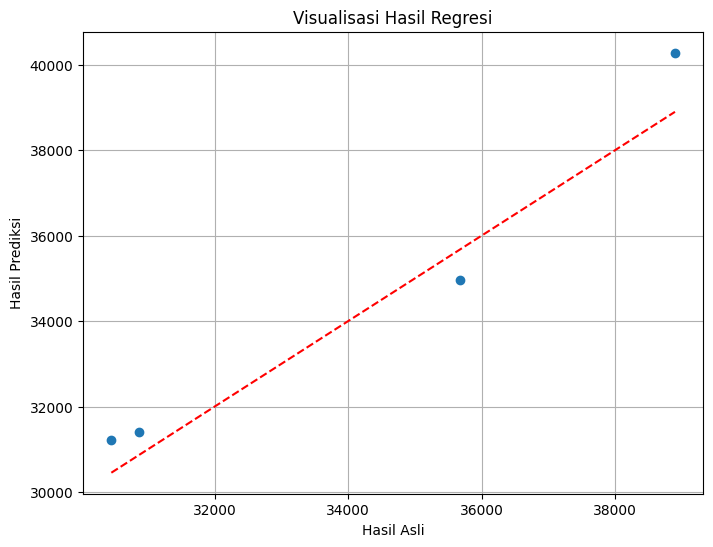

In [143]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')

plt.title("Visualisasi Hasil Regresi")
plt.xlabel("Hasil Asli")
plt.ylabel("Hasil Prediksi")
plt.grid(True)
plt.show()

## E. Evaluasi

### E.1 Menghitung MSE

In [145]:
error_test = y_test - y_pred_test
error_train = y_train - y_pred_train
mse = np.sum(error_test ** 2)
mse

np.float64(3257023.673716236)

### E.2 Menghitung MAE

In [139]:
mae = np.sum(abs(error_test))
mae

np.float64(3367.2324755818445)

### E.3 Menghitung RMSE

In [140]:
rmse = np.sqrt(mse)
rmse

np.float64(1804.7226029825847)

### E.4 Menghitung R-Squared (Akurasi)

In [146]:
ss_residual = np.sum(error_train ** 2)
ss_total = np.sum((y_data - np.mean(y_data)) ** 2)
r2_score = 1 - ss_residual / ss_total
r2_score

np.float64(0.9712360740562618)

In [147]:
ss_residual = np.sum(error_test ** 2)
ss_total = np.sum((y_data - np.mean(y_data)) ** 2)
r2 = 1 - ss_residual / ss_total
r2

np.float64(0.9966607920576309)

In [148]:
ones = np.ones((len(X_data), 1))
X_matrix = np.concatenate((ones, X_data), axis=1)

In [149]:
theta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train

y_pred = X_test @ theta

In [150]:
ss_res = np.sum(error_test ** 2)
ss_tot = np.sum((y_data - np.mean(y_data)) ** 2)
rsquared = 1 - ss_res / ss_tot
rsquared

np.float64(0.9966607920576309)

<Axes: xlabel='experience', ylabel='income'>

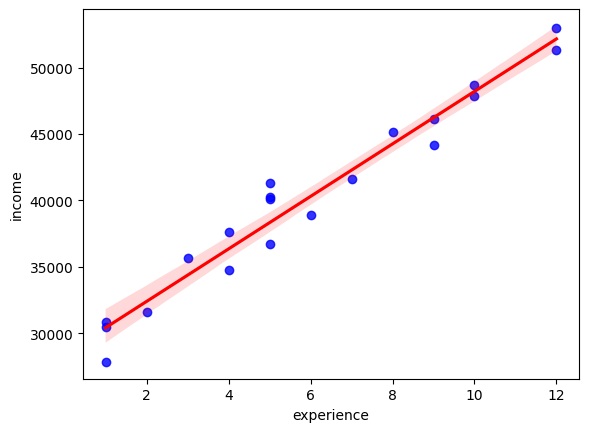

In [151]:
sns.regplot(data=df, x='experience', y='income', color='blue', line_kws={'color' : 'red'})


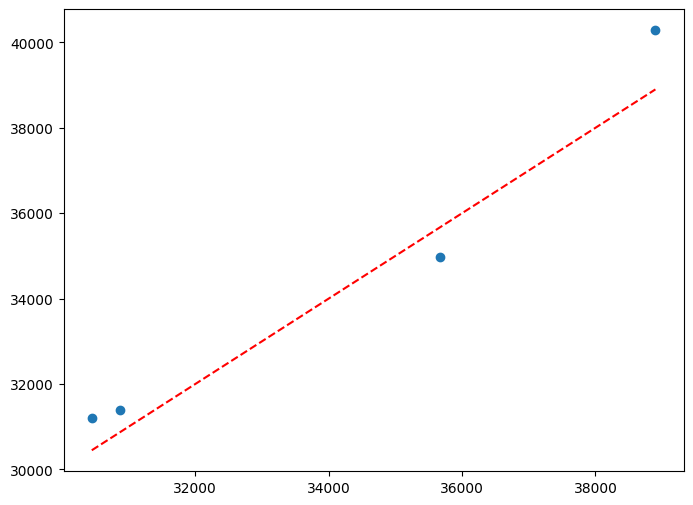

In [153]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')